In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import os
import cv2
import glob
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from   tensorflow.keras.layers import Input
from   tensorflow.keras.applications.inception_v3 import InceptionV3
from   utils.data_prep_utils import LABELS, DATES, prep_data, VID_CAT ,prep_categorized_data
from   utils.train_utils import prep_data_train_val_test, set_curr_time, show_sample
# from utils.data_prep_utils import DATES, VID_CAT, prep_categorized_data
# from utils.train_utils import prep_data_train_val_test, show_sample

In [3]:
labels = ['zeev', 'or', 'ron', 'aviya', 'felix']

In [4]:
x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(DATES, labels,
                                                                              frames_size=32, is_dim_3d=False)
# x_train, x_valid, x_test, y_train, y_valid, y_test = prep_data_train_val_test(DATES, labels, frames_size=128)

100%|██████████| 3000/3000 [00:00<00:00, 3486.94it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 30000/30000 [00:08<00:00, 3360.88it/s]
0it [00:00, ?it/s]
100%|██████████| 22000/22000 [00:03<00:00, 6761.49it/s] 
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 21000/21000 [00:06<00:00, 3426.55it/s]


In [5]:
best_loaded = tf.keras.models.load_model('../models/5_lbls_relu_[32, 512, 256, 0.2]_201978_11_6.h5')
test_predictions = best_loaded.predict(x_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [6]:
# x_train_rgb = np.repeat(x_train[..., np.newaxis], 3, -1)
# x_val_rgb = np.repeat(x_valid[..., np.newaxis], 3, -1)
# x_test_rgb = np.repeat(x_test[..., np.newaxis], 3, -1)

In [7]:
# input_tensor = Input(shape=(128, 128, 3))

In [8]:
# best_loaded = tf.keras.models.load_model('../models/inceptionv3_201965_23_16.h5')

In [9]:
best_loaded.evaluate(x_test, y_test)

14200/14200 [==============================] - 1s 49us/sample - loss: 1.4084 - acc: 0.7160


[1.4083672838500738, 0.7159859]

In [10]:
acc = 0
total = 0
predicted_dict = {}

for lbl in labels:
    predicted_dict[lbl] = []

for i, lbl in enumerate(y_test):
#     if lbl != 1:
        total += 1
        predicted_dict[labels[lbl]].append(np.float16(test_predictions[i]))
        if np.argmax(test_predictions[i]) == lbl:
            acc += 1
#     else:
#         print(lbl)
print('acc: ', (acc/total*100))

acc:  71.59859154929578


### plotting

In [11]:
test_predictions.shape

(14200, 5)

In [12]:
def plot_graph(test_predictions, labels, title):
    # rows = num_of_pics; cols = array_of_preds(labels)
    data = test_predictions

    x = np.arange(data.shape[0])
    dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
    d = 1./(data.shape[1]+2.)

    fig, ax=plt.subplots()
    for i in range(data.shape[1]):
        ax.bar(x,data[:,i], width=d, label="label {}".format(labels[i]))

    plt.xticks(np.arange(data.shape[0]),[i for i in range(test_predictions.shape[0])])
    plt.title("{0}'s Graph".format(lbl))
    plt.xlabel("number of pictures")
    plt.ylabel("output of prediction")
    plt.legend(framealpha=1).draggable()
    plt.gcf().set_size_inches(15, 5, forward=True)
    plt.show()

In [14]:
#todo:
# 1. graph with specific frames per person and total (frames with water, withous, angry, happy, etc.)
# 2. graph of persons outside our training set
# 3. all graphs -> mean & std

# DONE!!!

/Users/zeevkalyuzhner/.virtualenvs/speckles-ml/lib/python3.7/site-packages/matplotlib/legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


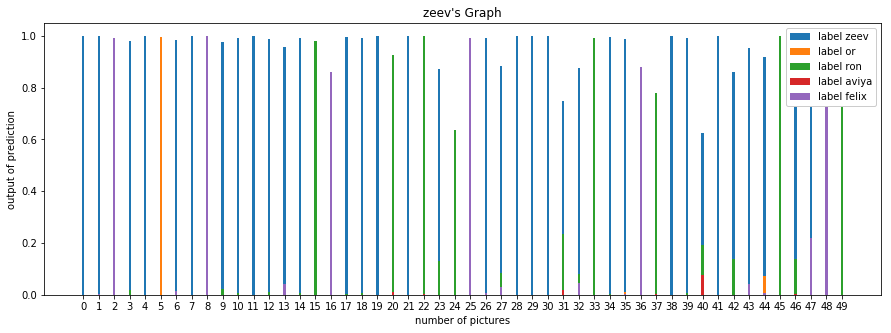

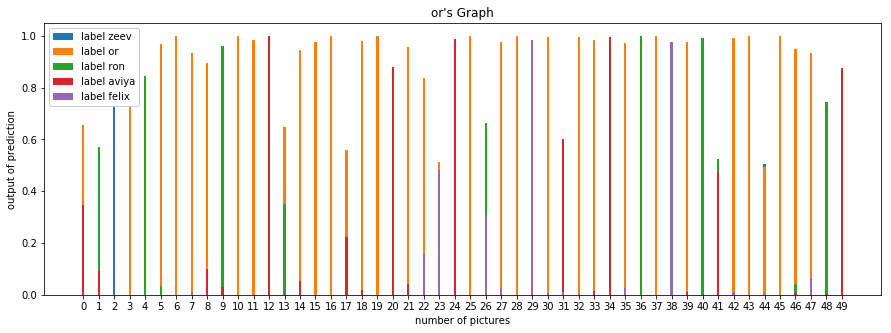

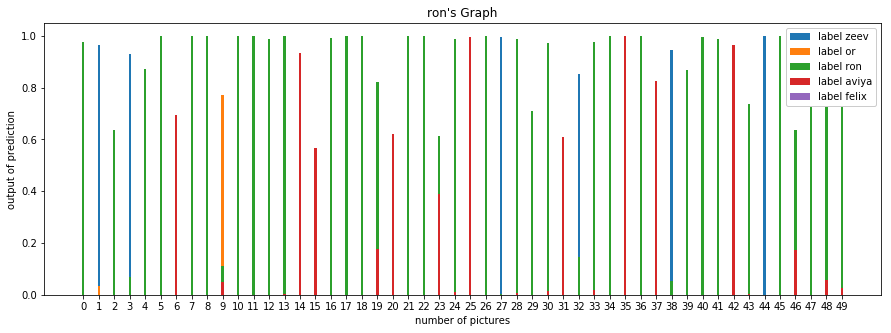

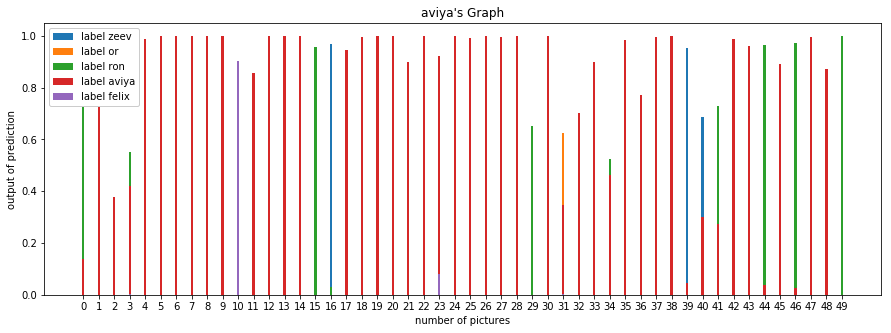

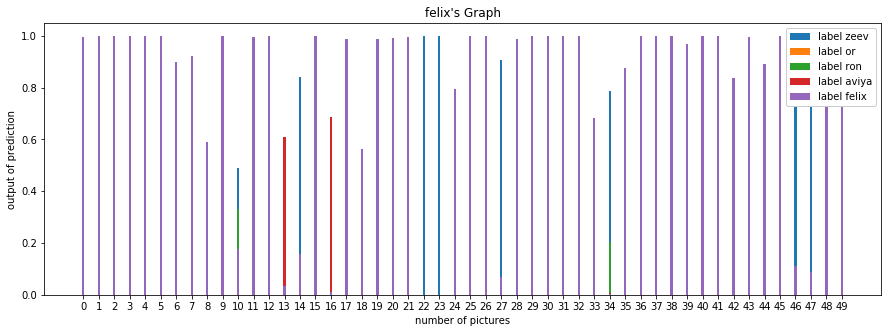

In [15]:
for lbl, val in predicted_dict.items():
    np.random.shuffle(val)
    plot_graph(np.array(val[:50]), labels, lbl)

### 02.06.2019 meeting summary:
TODO:
1. graph with specific frames per person and total (frames with water, withous, angry, happy, etc.)
2. graph of persons outside our training set
3. all graphs -> mean & std

# DONE!!!

### splitting videos categories

In [ ]:
prep_categorized_data(DATES, labels, VID_CAT, frames_size=32)

##### graph I

In [16]:
dd = {}

for i, l in enumerate(labels):
    dd[l] = {}
    for vc in VID_CAT:
        dd[l][vc] = {}
        dd[l][vc]['x'] = []
        dd[l][vc]['y'] = []
        for d in DATES:
            for f in tqdm(glob.glob('../data/categorized_frames/{0}/{1}/32/{2}/*.png'.format(d, l, vc))):
                dd[l][vc]['x'].append(cv2.imread(f, cv2.IMREAD_GRAYSCALE))
                dd[l][vc]['y'].append(i)
        dd[l][vc]['x'] = np.asarray(dd[l][vc]['x'])
        dd[l][vc]['y'] = np.asarray(dd[l][vc]['y'])

100%|██████████| 3000/3000 [00:00<00:00, 3776.66it/s]
0it [00:00, ?it/s]
100%|██████████| 4000/4000 [00:00<00:00, 11743.33it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 11877.37it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 11268.07it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 10543.82it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 11521.80it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 10965.63it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 3657.24it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 3618.63it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 3163.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3000/3000 [00:00<00:00, 3678.63it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
1

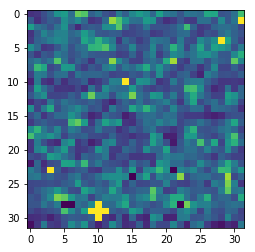

(None, 0)

In [17]:
show_sample(dd['zeev']['regular']['x'], 0), dd['zeev']['regular']['y'][0]

In [18]:
len(dd['ron']['smile']['x']), len(dd['or']['smile']['x'])

(3000, 3000)

In [19]:
for k, v in tqdm(dd.items()):
    for kk, vv in v.items():
        if len(vv['x']) > 0:
            vv['predicted'] = best_loaded.predict(vv['x'])

100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


In [20]:
dd['zeev']['regular']['predicted'][:5]

array([[2.0666195e-03, 8.8715623e-04, 6.8950623e-02, 9.2809564e-01,
        2.0796412e-08],
       [9.9912077e-01, 1.9655623e-05, 6.0541939e-04, 2.5404597e-04,
        1.0842088e-07],
       [9.0893015e-02, 8.6892164e-01, 4.0160637e-02, 2.1304724e-05,
        3.3340723e-06],
       [8.1084892e-03, 1.3301346e-17, 9.9189150e-01, 1.9201043e-14,
        3.0818409e-08],
       [9.9989223e-01, 9.0955124e-05, 4.4786120e-06, 1.2234582e-05,
        7.7894163e-11]], dtype=float32)

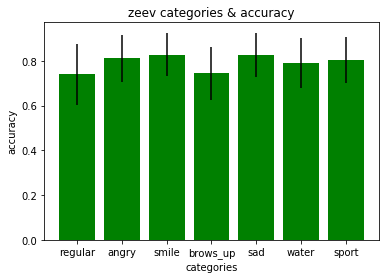

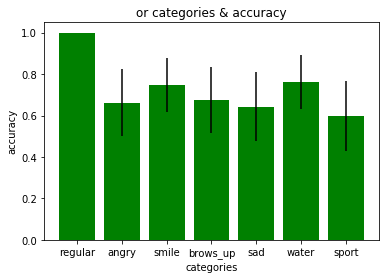

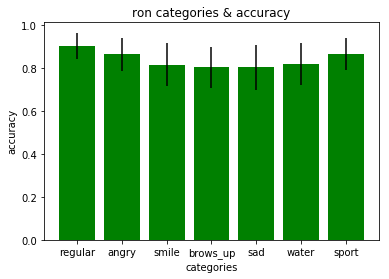

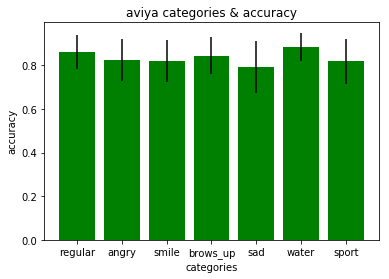

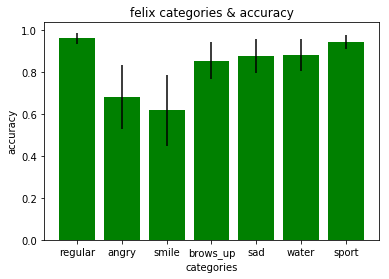

In [21]:
for i, l in enumerate(labels):
    auto_corr = []
    var_by_category = []
    for vc in VID_CAT:
        auto = 0
        var_list = []
        for p in dd[l][vc]['predicted']:
            auto += p[i]
            var_list.append(p[i])
#             print(l, vc, auto / len(dd[l][vc]['predicted']) * 100)
        auto_corr.append(auto / len(dd[l][vc]['predicted']))
        var_by_category.append(np.var(var_list))

    x_pos = [i for i, _ in enumerate(VID_CAT)]
    plt.bar(x_pos, auto_corr, color='green', yerr=var_by_category)
    plt.xlabel("categories")
    plt.ylabel("accuracy")
    plt.title("{0} categories & accuracy".format(l))
    plt.xticks(x_pos, VID_CAT)
    plt.show()

##### graph II

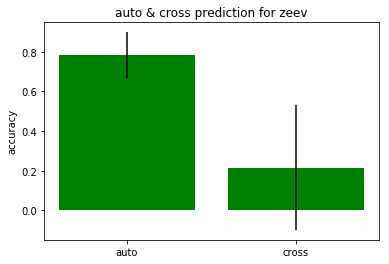

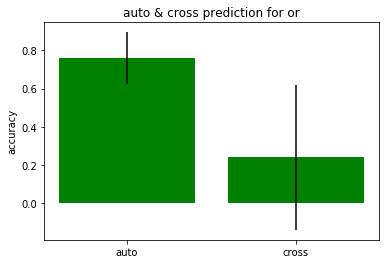

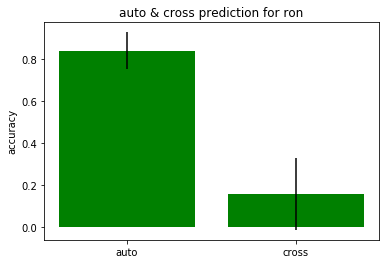

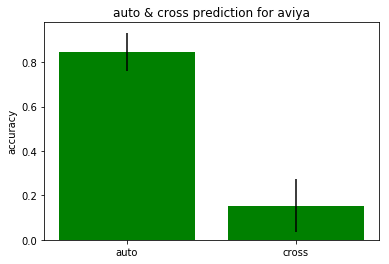

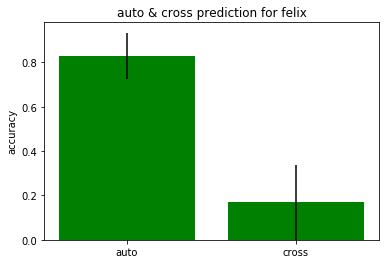

In [35]:
for i, l in enumerate(labels):
    
    auto_var_list = []
    cross_var_list = []
    
    auto = 0
    cross = 0
    
    l_len = 0
    
    for vc in VID_CAT:
        for p in dd[l][vc]['predicted']:
            auto += p[i]
            l_len += 1
            for idx, score in enumerate(p):
                if idx is not i:
                    cross += p[idx]
            auto_var_list.append(p[i])
            cross_var_list.append(np.mean(cross / len(dd[l][vc]['predicted'])))
                
    x_pos = [0, 1]
    total_corr = [(auto / l_len), (cross / l_len)]
    total_var = [(np.var(auto_var_list)), (np.var(cross_var_list))]
    plt.bar(x_pos, total_corr, color='green', yerr=total_var)
    plt.ylabel("accuracy")
    plt.title("auto & cross prediction for {0}".format(l))
    plt.xticks(x_pos, ['auto', 'cross'])
    plt.show()

##### graph II

In [ ]:
def plot_auto_cross_graph(x_test, y_test, labels):

    test_predictions = best_loaded.predict(x_test)
    total            = 0
    counter          = 0
    label_name       = ""
    predicted_dict   = {}
    person_total     = {}
    predicted_total  = {}
    auto_std_array   = [[],[],[],[],[],[]]
    cross_std_array  = [[],[],[],[],[],[]]

    
    for lbl in labels:
        person_total[lbl]    = 0

        predicted_dict[lbl]  = {"auto": 0,"cross": 0,"max_auto": 0,"min_auto": 1,\
                               "max_cross": 0,"min_cross": 1,"auto_std":0, "cross_std":0}
       
    predicted_total["total"] = {"auto": 0,"cross": 0,"max_auto": 0,"min_auto": 1,\
                               "max_cross": 0,"min_cross": 1,"auto_std":0, "cross_std":0}
    
    
    for i, lbl in enumerate(y_test):
            total += 1
            auto_value  = test_predictions[i][lbl]
            cross_value = np.sum(test_predictions[i]) - test_predictions[i][lbl]

            auto_std_array[lbl].append(auto_value)
            auto_std_array[len(labels)].append(auto_value)

            cross_std_array[lbl].append(cross_value)
            cross_std_array[len(labels)].append(cross_value)
            
            person_total[labels[lbl]] +=1
            predicted_dict[labels[lbl]]["auto"] += auto_value
            predicted_dict[labels[lbl]]["cross"] += cross_value

            if predicted_dict[labels[lbl]]["max_auto"] < auto_value :
                predicted_dict[labels[lbl]]["max_auto"] = auto_value

            if predicted_dict[labels[lbl]]["max_cross"] < cross_value :
                predicted_dict[labels[lbl]]["max_cross"] = cross_value

            if predicted_dict[labels[lbl]]["min_auto"] > auto_value :
                predicted_dict[labels[lbl]]["min_auto"] = auto_value

            if predicted_dict[labels[lbl]]["min_cross"] > cross_value :
                predicted_dict[labels[lbl]]["min_cross"] = cross_value            

    for k,v in predicted_dict.items():
        for i,lbl in enumerate(labels):
            if i == counter:
                label_name = lbl
                break;
             
        predicted_dict[label_name]["auto_std"]=np.std(auto_std_array[counter])
        predicted_dict[label_name]["cross_std"]=np.std(cross_std_array[counter])        
        predicted_total["total"]["auto"]  += v["auto"]
        predicted_total["total"]["cross"] += v["cross"]

        if predicted_total["total"]["max_auto"]  < v["max_auto"] :
            predicted_total["total"]["max_auto"] = v["max_auto"]

        if predicted_total["total"]["max_cross"]  < v["max_cross"]  :
            predicted_total["total"]["max_cross"] = v["max_cross"]

        if predicted_total["total"]["min_auto"]  > v["min_auto"] :
            predicted_total["total"]["min_auto"] = v["min_auto"]

        if predicted_total["total"]["min_cross"]  > v["min_cross"] :
            predicted_total["total"]["min_cross"] = v["min_cross"]  


        v["auto"]  /= person_total[k]
        v["cross"] /= person_total[k]
        counter += 1

    predicted_total["total"]["auto"]  /= total
    predicted_total["total"]["cross"]  /= total
    predicted_total["total"]["auto_std"]=np.std(auto_std_array[len(labels)])
    predicted_total["total"]["cross_std"]=np.std(cross_std_array[len(labels)])

    z= predicted_dict.copy()
    z.update(predicted_total)
    return z
dict_final_data = plot_auto_cross_graph(x_test, y_test, labels)

In [ ]:
dict_final_data

In [ ]:
def plot_auto_cross_graph(sample_name,dict_list):
   
    ind     = np.arange(2)
    width   = 0.15
    xticks  = ["Auto", "Cross"]
    y       = [dict_list["auto"],dict_list["cross"]]    
    fig, ax = plt.subplots()  
    ax.bar(ind,y, width=width, yerr=[[abs(dict_list["auto_std"]),abs(dict_list["cross_std"])],\
                                     [abs(dict_list["auto_std"]),abs(dict_list["cross_std"])]])        
    
    plt.title('Auto & Cross prediction for {}'.format(sample_name))  
    plt.xticks(ind, xticks)
    plt.yticks(np.arange(-0.2,1.7,0.1))
    plt.ylabel("Accuracy")
    plt.show()

for k,v in dict_final_data.items():
    plot_auto_cross_graph(k,v)